<a href="https://colab.research.google.com/github/eskutza/NeuralNetwork/blob/main/colab/regresion_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

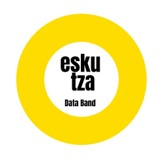

</center>


<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h1><b>
Inteligencia Artificial con Tensorflow y PyTorch

# <h2><font color="#0A66C2"> **Fase 1: cargar librerías**

### <font color="#333F49">**Tensorflow** <font>

In [1]:
from tensorflow import keras

In [2]:
from tensorflow.keras import layers

### <font color="#333F49">**Sklearn** <font>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### <font color="#333F49"> **Para el análisis de datos y el conjunto de datos** <font>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### <font color="#333F49"> **Para los gráficos** <font>

In [5]:
import matplotlib.pyplot as plt
from joblib import dump, load

# <h2><font color="#0A66C2"> **Fase 2: cargar el dataset y cálculos estadísticos iniciales**

In [6]:
url = "https://raw.githubusercontent.com/eskutza/NeuralNetwork/main/datasets/power-plant-gas-emissions.csv"

In [7]:
df = pd.read_csv(url, sep =',')
df

,ambient_temperature,ambient_pressure,ambient_humidity,air_filter_difference_pressure,gas_turbine_exhaust_pressure,turbine_inlet_temperature,turbine_after_temperature,compressor_discharge_pressure,turbine_energy_yield,CO,NOx
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [8]:
df = df.drop(['CO'], axis=1)
df

,ambient_temperature,ambient_pressure,ambient_humidity,air_filter_difference_pressure,gas_turbine_exhaust_pressure,turbine_inlet_temperature,turbine_after_temperature,compressor_discharge_pressure,turbine_energy_yield,NOx
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,64.738


In [9]:
columns = df.columns
statistics = df.describe(include ='all')
statistics


,ambient_temperature,ambient_pressure,ambient_humidity,air_filter_difference_pressure,gas_turbine_exhaust_pressure,turbine_inlet_temperature,turbine_after_temperature,compressor_discharge_pressure,turbine_energy_yield,NOx
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,119.910000


# <h2><font color="#0A66C2"> **Fase 3: correlación entre la variable objetivo y las variables de entrada**

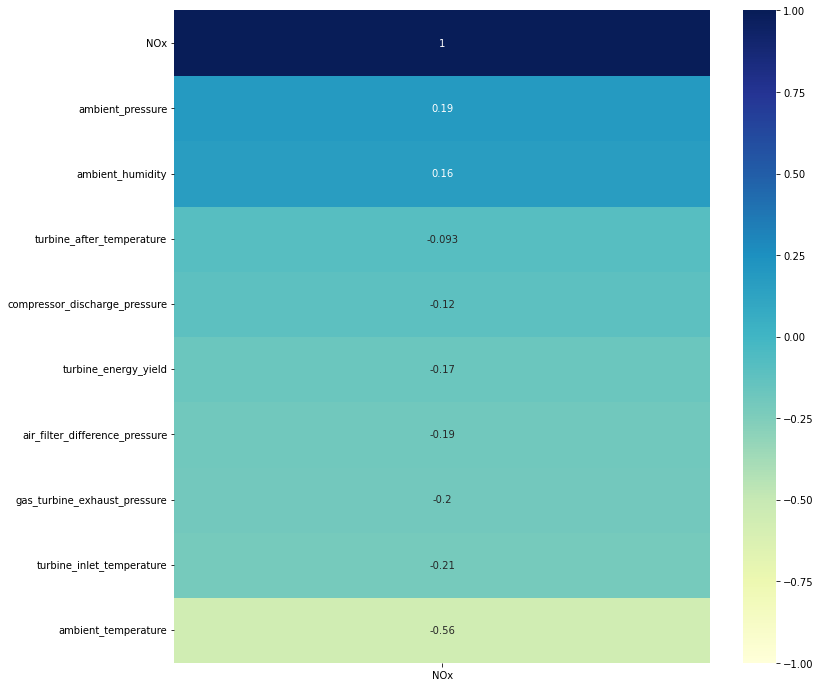

In [10]:
fig,ax =plt.subplots(figsize =(12,12))
sns.heatmap (df.corr()[['NOx']].sort_values ('NOx').tail(11), vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax)
ax.invert_yaxis()

# <h2><font color="#0A66C2"> **Fase 4: histograma**

[None, None, None, None, None, None, None, None, None, None, None, None]

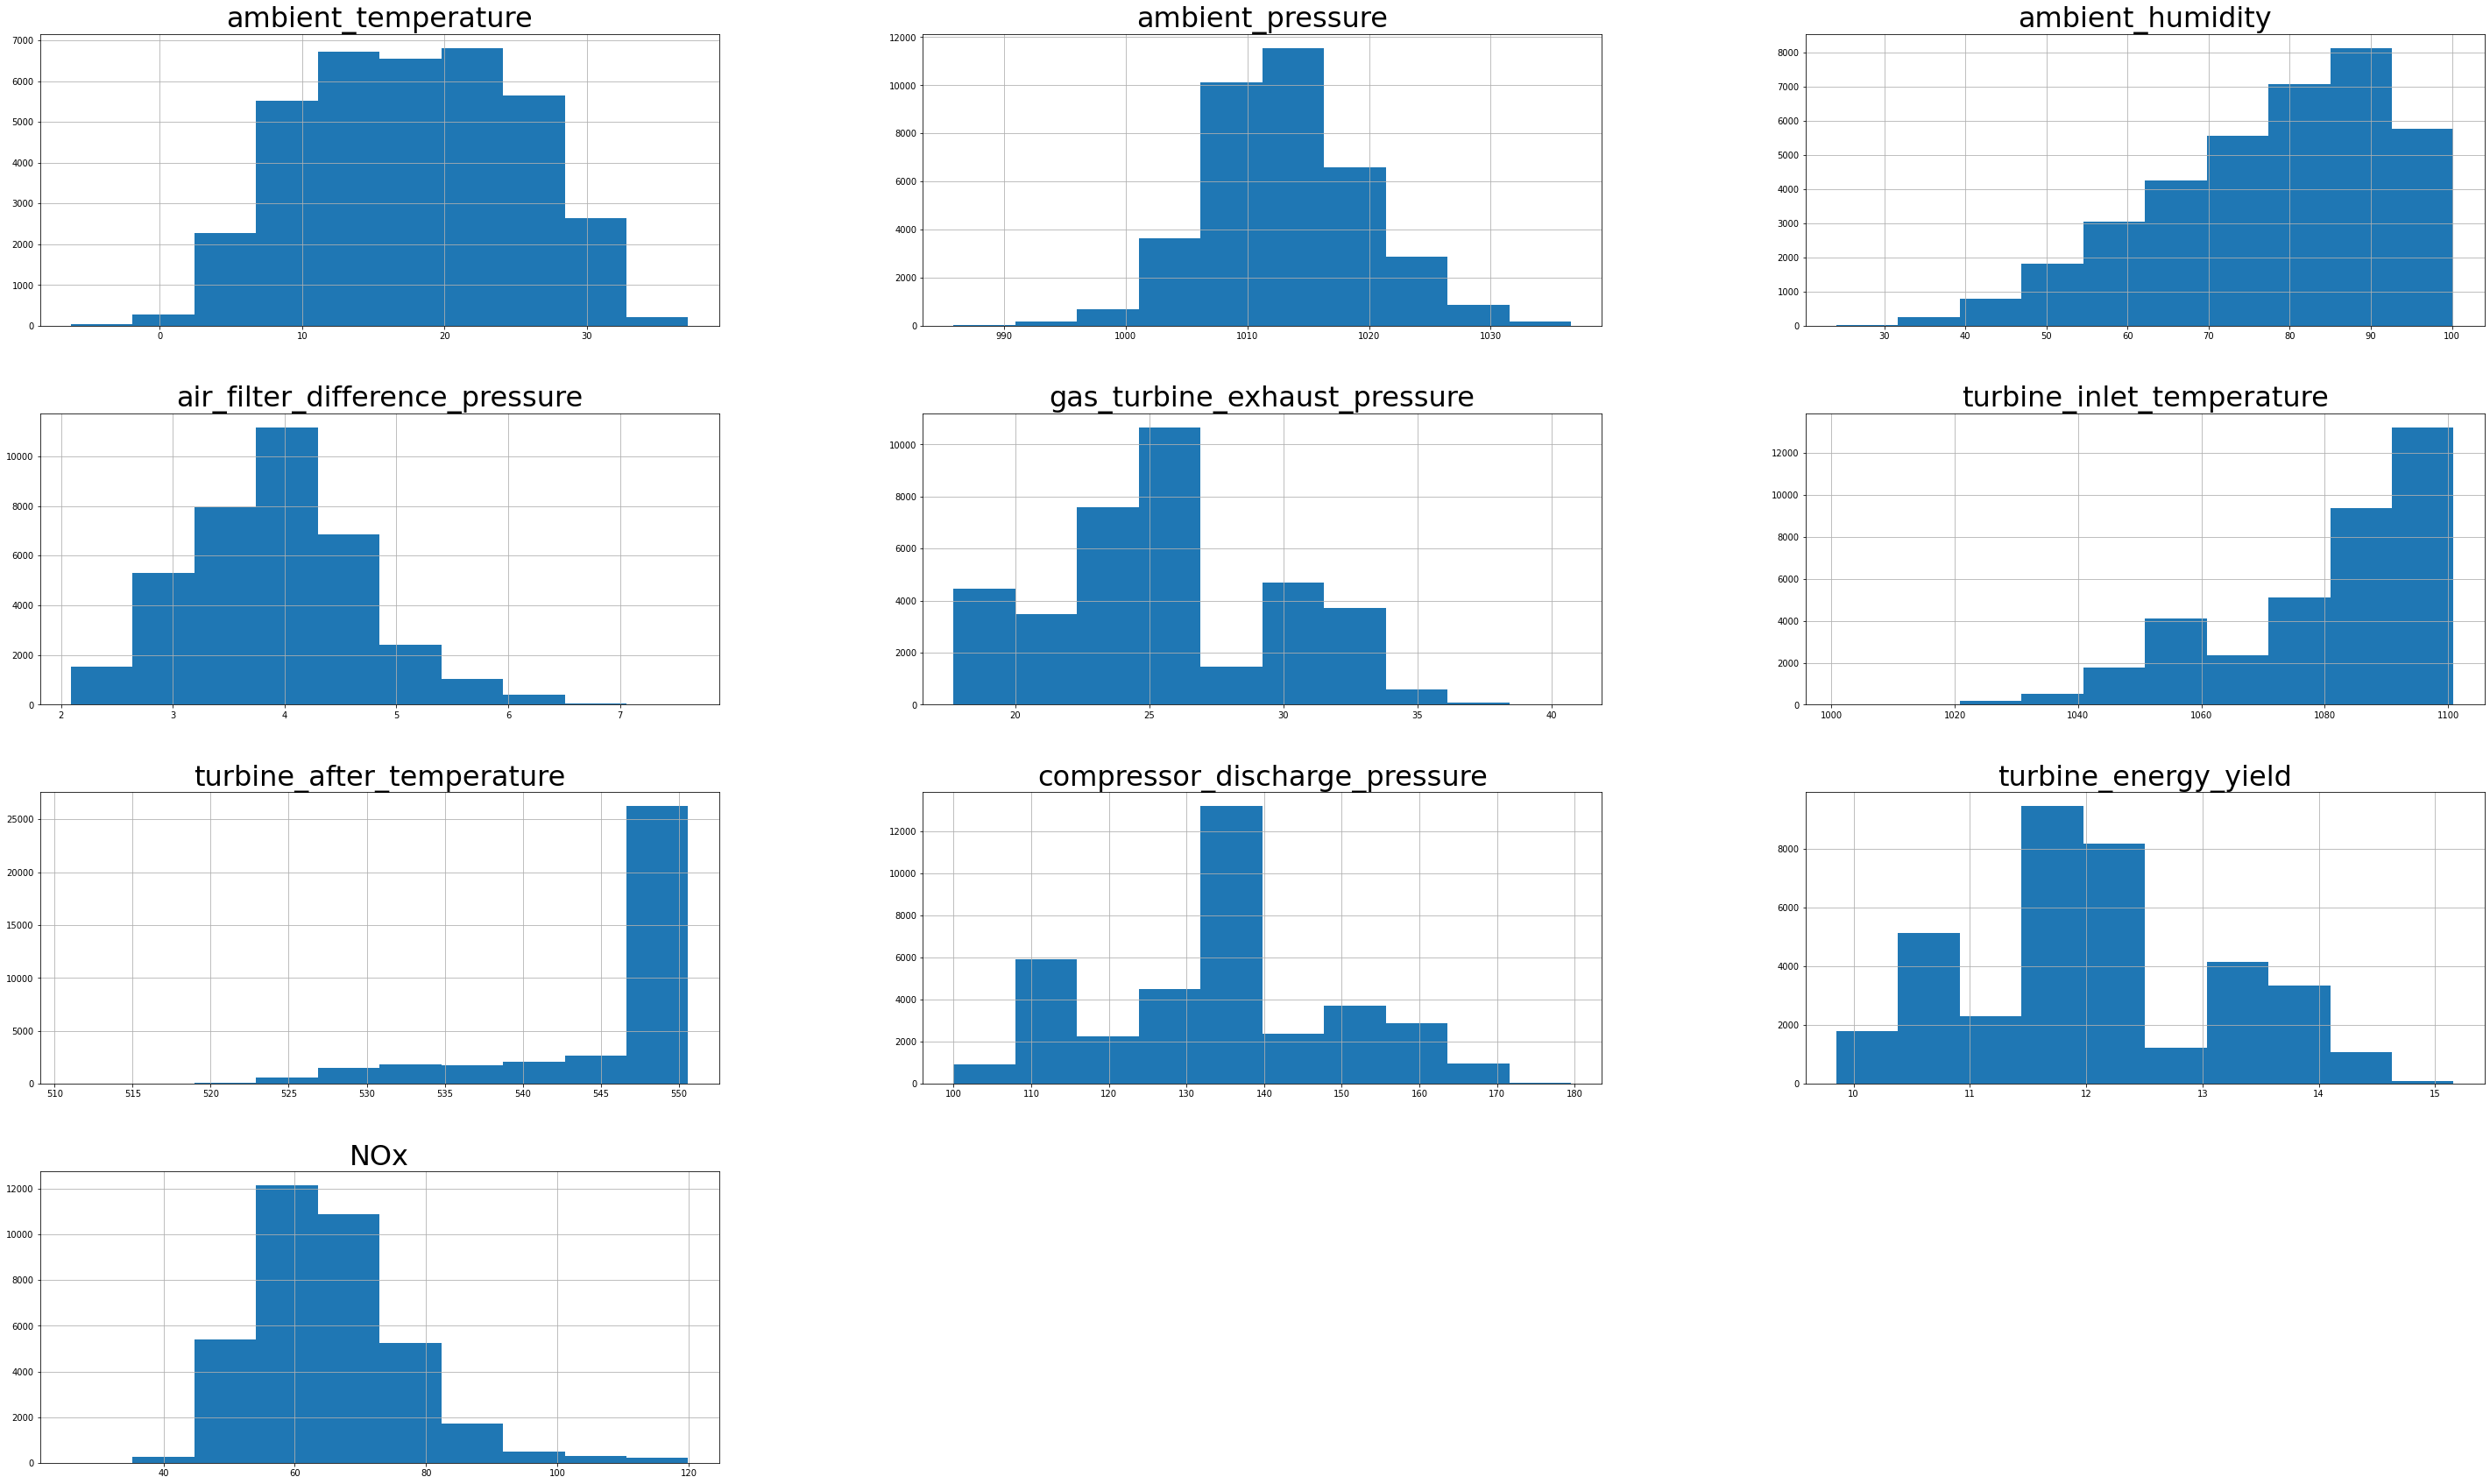

In [11]:
fig =df.hist(figsize=(50,30))
[x.title.set_size(32) for x in fig.ravel()]

# <h2><font color="#0A66C2"> **Fase 5: estandarización de las variables**

### <font color="#333F49">Usaremos StandardScaler de Sklearn <font>

#### <font color="#333F49">**definir Standard Scaler** <font>

In [12]:
scaler = StandardScaler()

#### <font color="#333F49">**transformación del dataset** <font>

In [13]:
scaled = scaler.fit_transform(df)

#### <font color="#333F49">**convertir numpay array a pandas dataframe** <font>

In [14]:
df_scaled = pd.DataFrame(scaled, columns = columns)
df_scaled

,ambient_temperature,ambient_pressure,ambient_humidity,air_filter_difference_pressure,gas_turbine_exhaust_pressure,turbine_inlet_temperature,turbine_after_temperature,compressor_discharge_pressure,turbine_energy_yield,NOx
0,-1.762362,0.871052,0.401627,-0.451875,-0.377702,0.272119,0.536589,0.074502,-0.149273,1.426499
1,-1.801920,0.809164,0.440351,-0.458207,-0.384376,0.266417,0.568742,0.074502,-0.154783,1.462891
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,1.582687
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,1.473852
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,1.433006
...,...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,2.044745
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,2.017086
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,2.642011
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,-0.047530


# <h2><font color="#0A66C2"> **Fase 6: división del set de datos (escalado) en entrenamiento y test**

### <font color="#333F49">**variables de entrada** <font>

In [15]:
X = df_scaled.iloc[:, :-1]

### <font color="#333F49">**variable objetivo** <font>

In [16]:
y = df_scaled.iloc[:,-1]

### <font color="#333F49">**dividir muestras de entrenamiento y test** <font>

Conjunto de entranamiento (67%)
Conjunto de test (33%)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 42,
                                                    test_size = 0.33)

# <h2><font color="#0A66C2"> **Fase 7: construir el modelo**

Construiremos un modelo secuencial con **tres capas**:
- **12 neuronas**, 'tanh' como función de activación que recibe 9 entradas de la capa de entrada. 
- **8 neuronas**, 'tanh' como función de activación y regularización L2. 
- **1 neurona** para la capa de salida, y 'lineal' como función de activación.

In [18]:
model = keras.Sequential()

In [19]:
model.add (layers.Dense(12, input_shape = (9,), activation ='tanh'))
model.add (layers.Dense(8, activation ='tanh', kernel_regularizer='l2'))
model.add (layers.Dense(1, activation ='linear'))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                120       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


# <h2><font color="#0A66C2"> **Fase 8: entrenamiento**

Para **entrenar el modelo**:
- Utilizamos **Adam como optimizador** y el error medio cuadrático **(mse)** como función de pérdida. 
- Establecemos un tamaño de lote de **100 y 400 épocas**. (batch_size: iteraciones de cada época).
- Utilizaremos un **callback** de parada temprana con una paciencia de **10 epochs**.

In [21]:
model.compile (optimizer = 'adam', loss = 'mse', metrics = ['mae', 'mse'])
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit (X_train, y_train, validation_split=0.2,
                     batch_size = 100, epochs = 400,
                     callbacks =  [early_stop])

Epoch 1/400
197/197 [==============================] - 1s 3ms/step - loss: 0.8026 - mae: 0.6439 - mse: 0.7119 - val_loss: 0.6197 - val_mae: 0.5525 - val_mse: 0.5352
Epoch 2/400
197/197 [==============================] - 0s 2ms/step - loss: 0.5571 - mae: 0.5007 - mse: 0.4776 - val_loss: 0.4799 - val_mae: 0.4621 - val_mse: 0.4049
Epoch 3/400
197/197 [==============================] - 1s 3ms/step - loss: 0.4414 - mae: 0.4299 - mse: 0.3701 - val_loss: 0.3983 - val_mae: 0.4097 - val_mse: 0.3309
Epoch 4/400
197/197 [==============================] - 1s 3ms/step - loss: 0.3805 - mae: 0.3961 - mse: 0.3165 - val_loss: 0.3607 - val_mae: 0.3848 - val_mse: 0.3008
Epoch 5/400
197/197 [==============================] - 1s 3ms/step - loss: 0.3505 - mae: 0.3800 - mse: 0.2942 - val_loss: 0.3363 - val_mae: 0.3754 - val_mse: 0.2832
Epoch 6/400
197/197 [==============================] - 0s 2ms/step - loss: 0.3324 - mae: 0.3716 - mse: 0.2825 - val_loss: 0.3210 - val_mae: 0.3678 - val_mse: 0.2739
Epoch 7/40

# <h2><font color="#0A66C2"> **Fase 9: graficar el proceso de entrenamiento**

In [22]:
def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train, Selecction'], loc = 'upper left')
  plt.show()

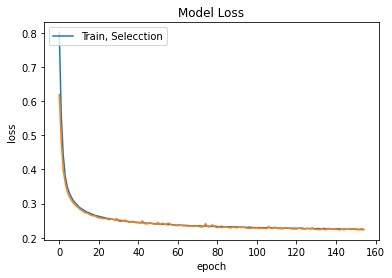

In [23]:
plot_history (history)

# <h2><font color="#0A66C2"> **Fase 10: test**

Finalmente, **predecimos los datos de prueba con nuestro modelo y los comparamos con los valores reales.**

In [24]:
y_predicted = model.predict (X_test)
print('r2_score: ', r2_score (y_test, y_predicted))

379/379 [==============================] - 1s 1ms/step
r2_score:  0.7778832382929926


### <font color="#333F49">**linear regression analysis** <font>

Text(0, 0.5, 'Predicted NOx')

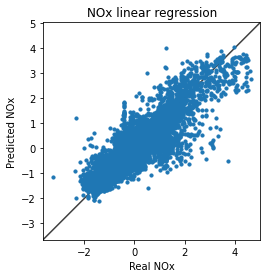

In [28]:
fig,ax = plt.subplots()
ax.scatter (y_test, y_predicted, s=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.title.set_text('NOx linear regression')
ax.set_xlabel('Real NOx')
ax.set_ylabel('Predicted NOx')


# <h2><font color="#0A66C2"> **Fase 11: implementación**

Podemos cargar el modelo entrenado para utilizarlo en un despliegue posterior.

### <font color="#333F49">**save model** <font>

In [29]:
model.save('/content/')

### <font color="#333F49">**load model** <font>

In [30]:
loaded_model = keras.models.load_model('/content/')

### <font color="#333F49">**save | load scaler** <font>

In [31]:
dump(scaler, '/content/std_scaler.bin', compress=True)

sc = load('/content/std_scaler.bin')


### <font color="#333F49">**Por último, podemos obtener las emisiones de NOx para valores de entrada aleatorios** <font>

In [32]:
in_array = np.array([5.0,1020.0,85.3,4.23,20.12,1100.0,552.196,139.54,12.65,0.00])

X_deploy = sc.transform(in_array.reshape(1,-1))
X_input = X_deploy[0][0:9]

X_input = pd.Series(X_input)
y_deploy = loaded_model.predict(X_input.values.reshape(1,-1))

deploy_row = np.append(X_input, y_deploy[0])

Nox_deploy = sc.inverse_transform(deploy_row.reshape(1,-1))[0][9]

print('NOx emissions predicted:',Nox_deploy)

1/1 [==============================] - 0s 77ms/step
NOx emissions predicted: 86.79160666193494


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
